In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# https://docs.python.org/3/library/warnings.html
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [34]:
# Load data
df_train = pd.read_csv('data/train.csv')
df_train.shape

(1460, 81)

### Data preview
First thing: 
- Checking out the data distributions and correlations

TODO: 
- Check missing data
- Check zeros
- Check (strange) sub-groups

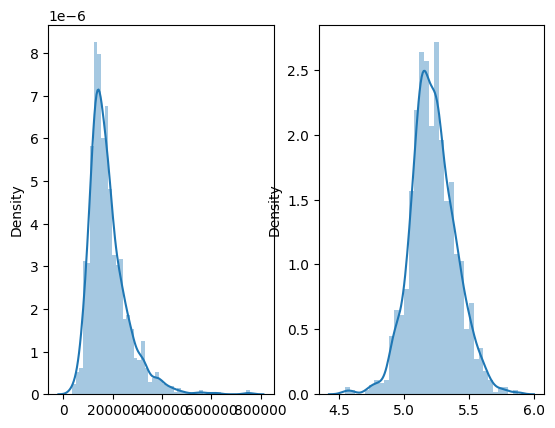

In [25]:
# Code from: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python
fig, axes = plt.subplots(1,2)

# Data has a long tail to the right
axes[0] = sns.distplot(ax=axes[0], x=df_train['SalePrice'])

# Log transform
axes[1] = sns.distplot(ax=axes[1], x=np.log10(df_train['SalePrice']))

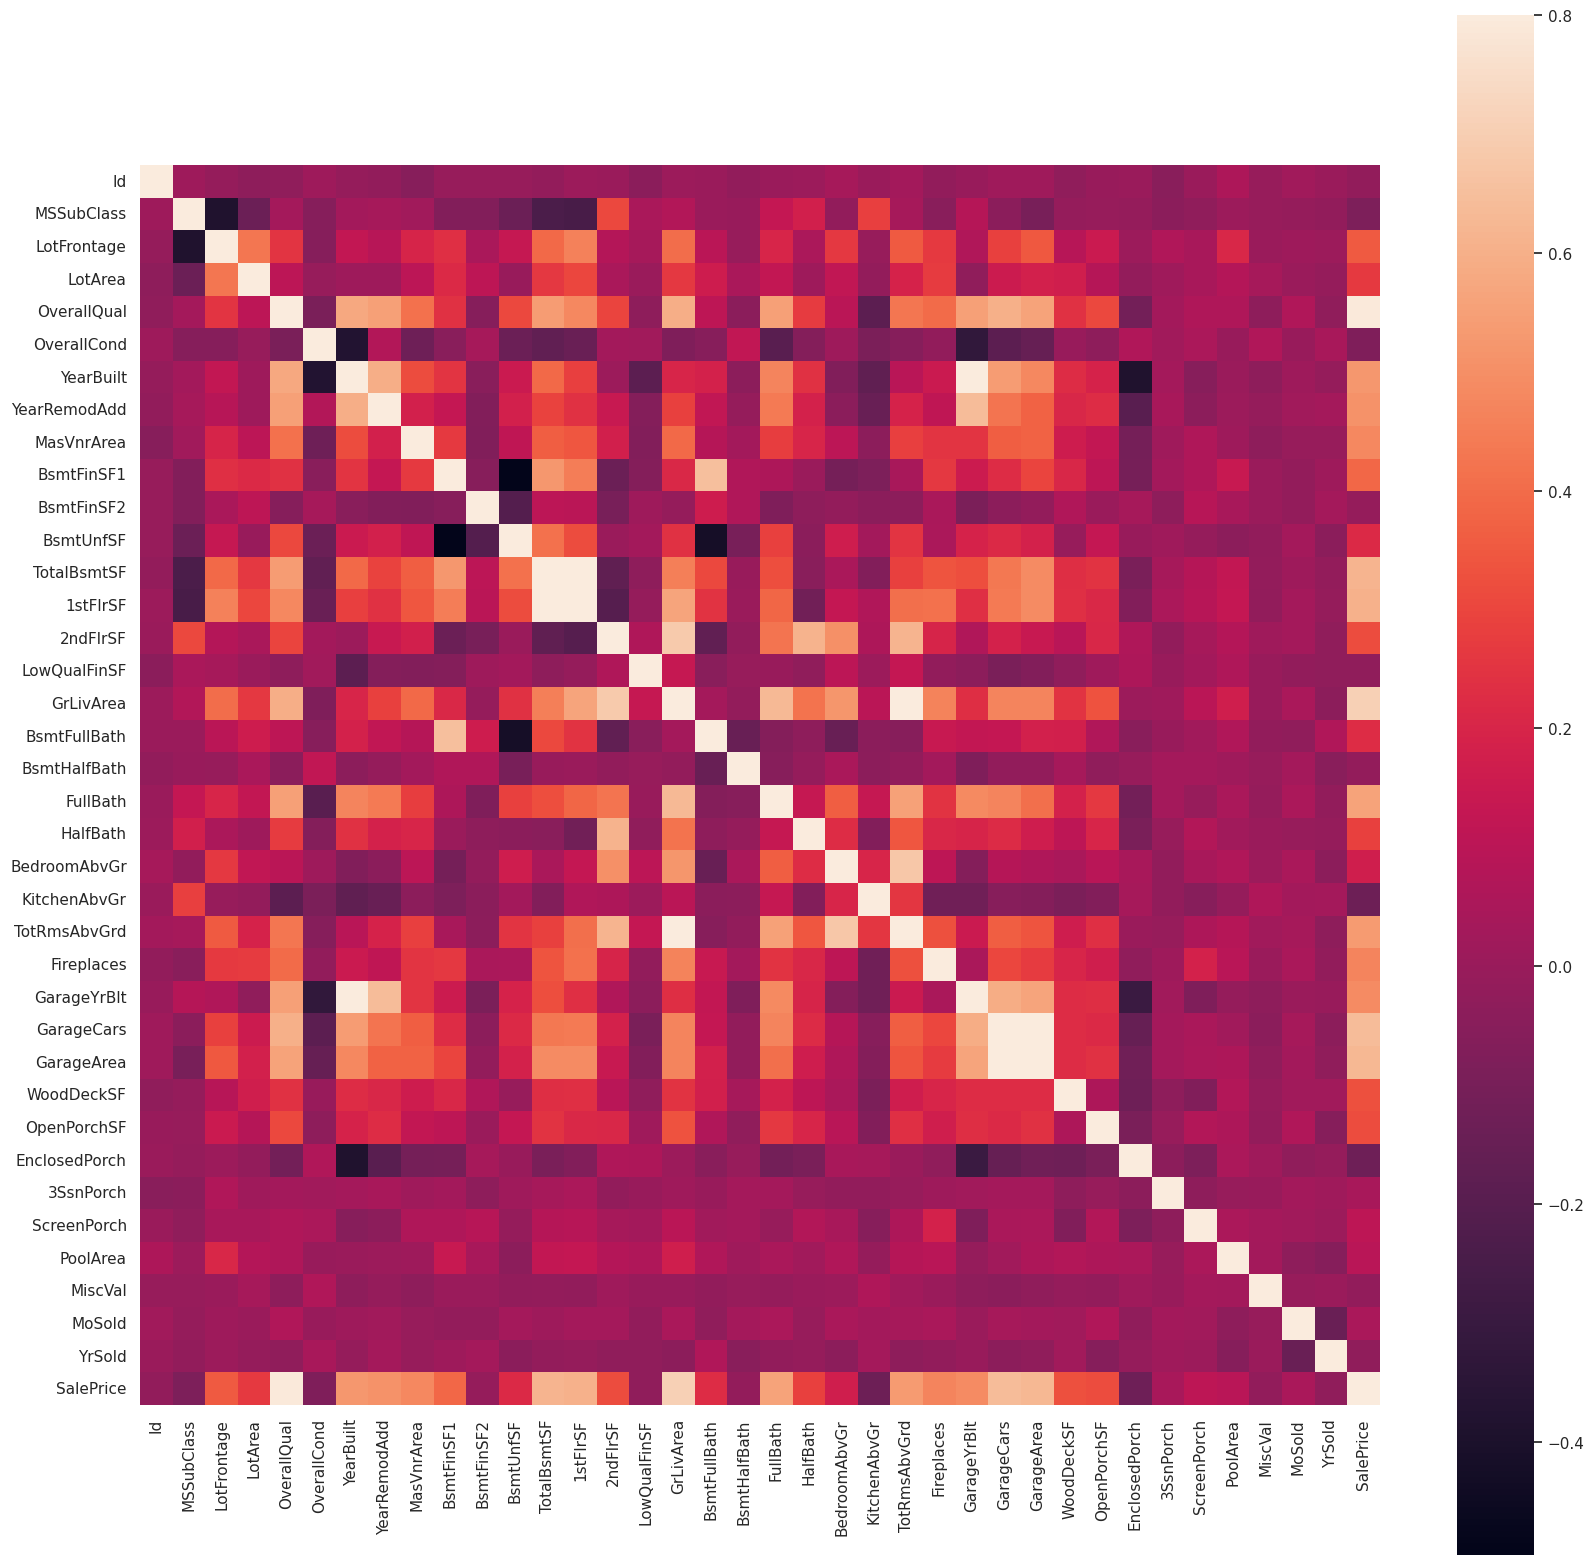

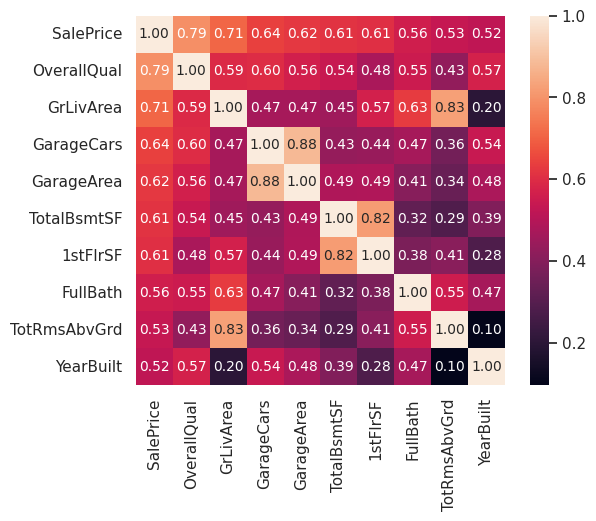

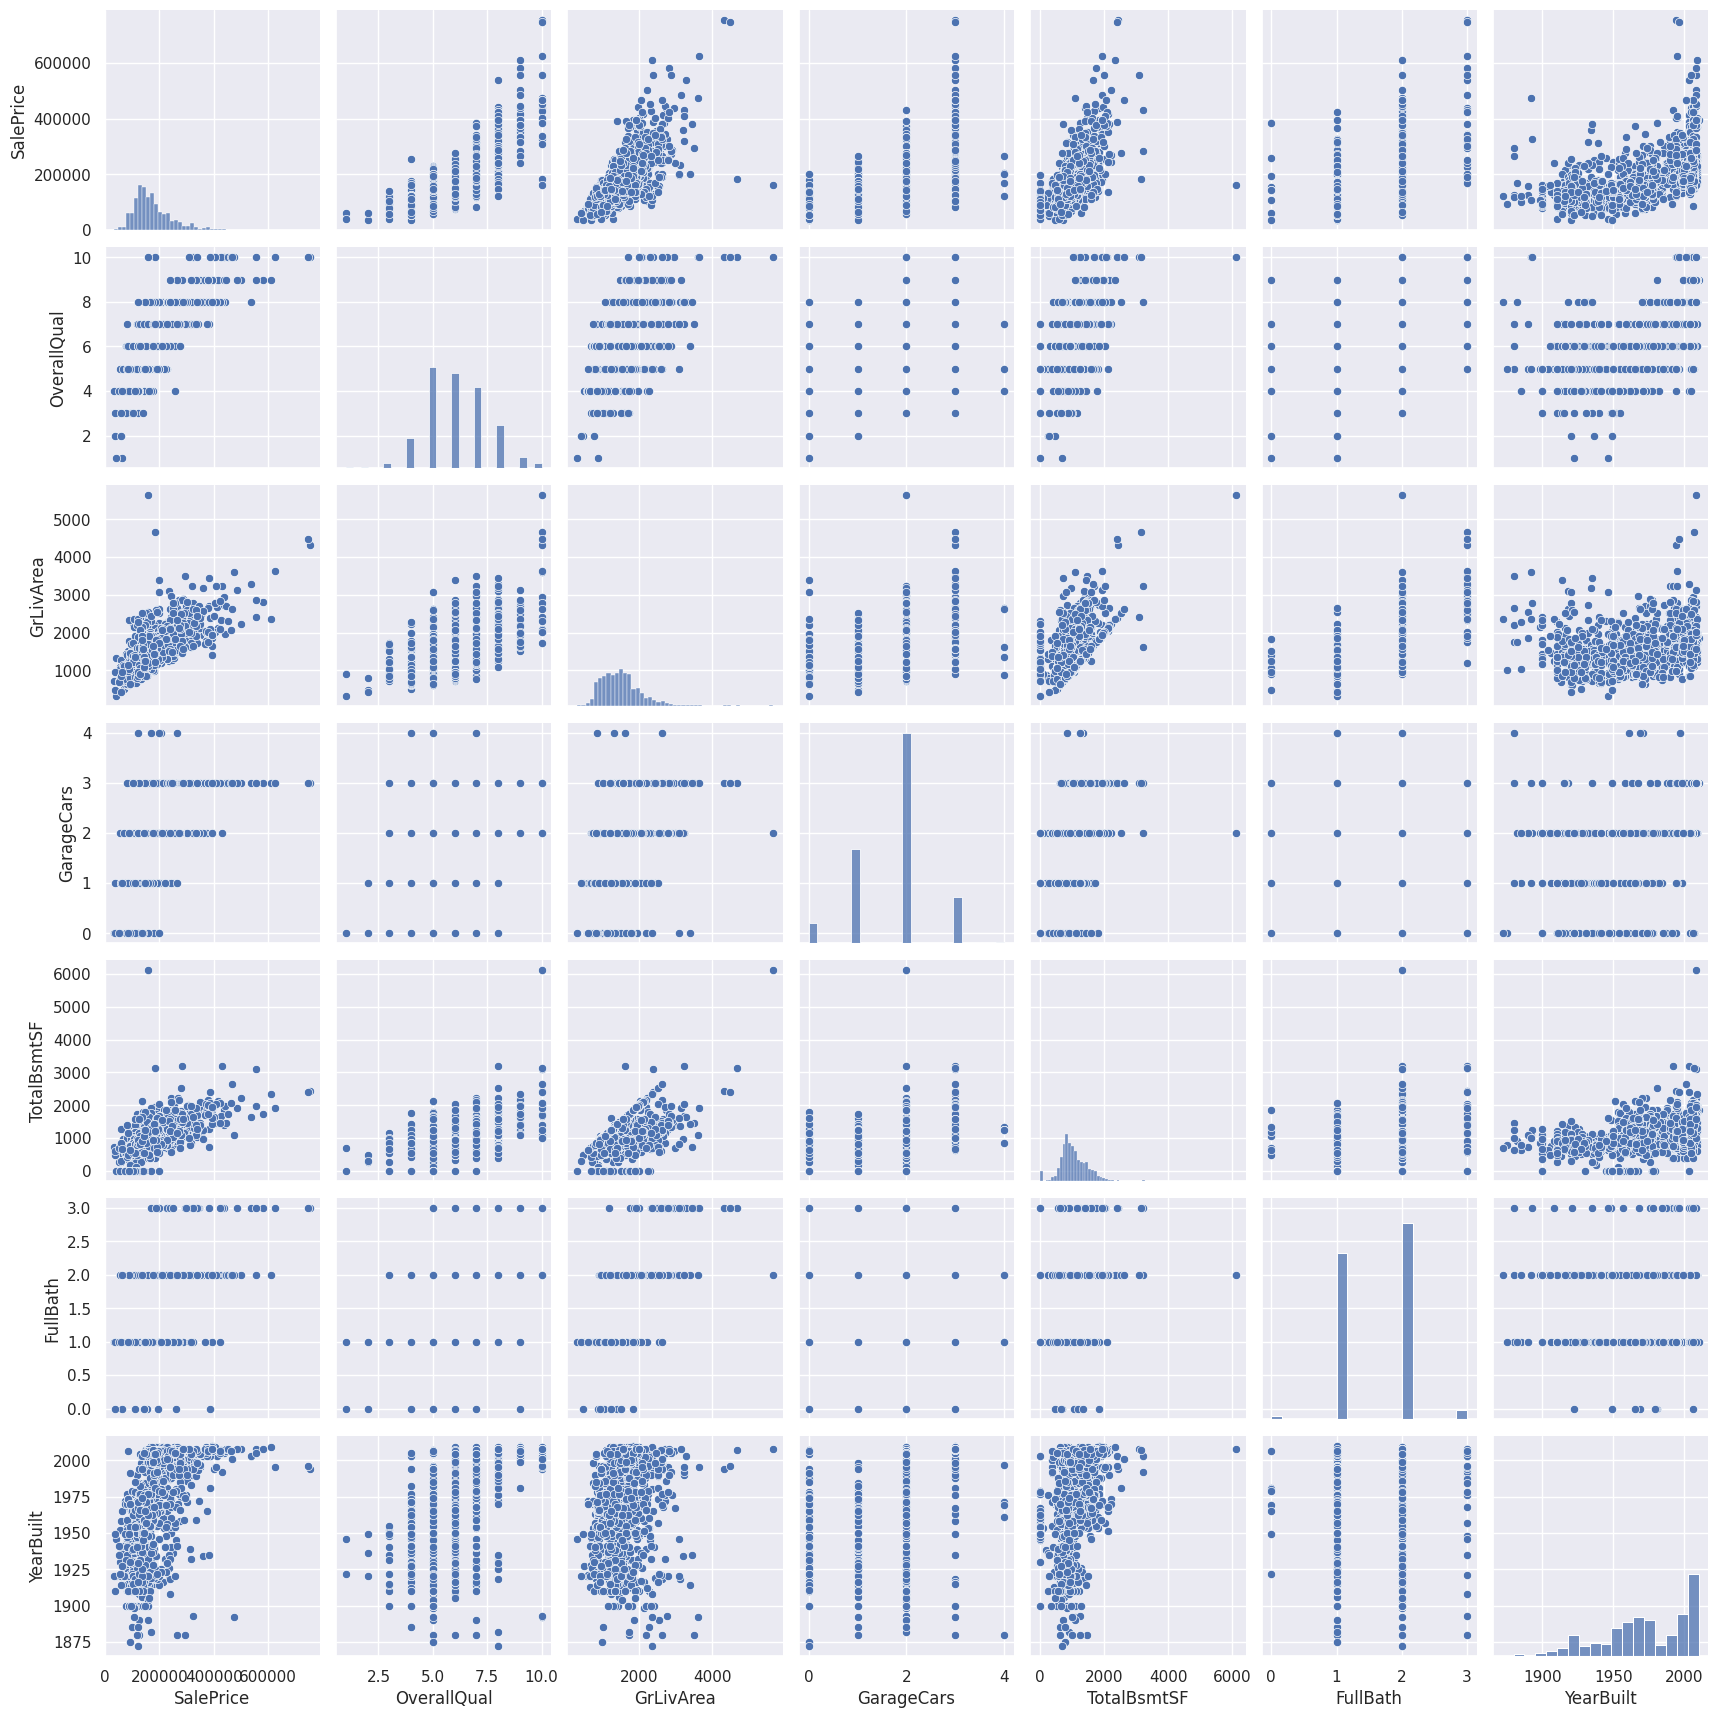

In [37]:
# Code from: https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))  # N cols limited to 20
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
#sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# scatterplot
#sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()